# 題目: 南山人壽保單
## 初步猜測會回購表單的人 多會因為常使用到該保單，所以會理賠較多次

In [40]:
# 讀取 CSV File
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('CLAIM.csv',encoding = 'big5')
df = df.fillna(0)
df.head(5)

,CASE_NO,INSURED_SEX,AGE_RANK,TENURE,ILLNESS_CD,illness_code_desc,HOSP_CD,hospital_name,REIMB_AMT_K,settle_dt,CountNo,REIMB_AMT_5Y_K,RECENCY_YEAR,CountCovNo,Sum_afyp_K,EFFECTdate,TYPE_CODE,AFYP_K
0,1,F,02.21~40,16,A47202,橈骨骨折,DM0068,澄清綜合醫院（中港分院）,7,2017/10/25,0.0,0.0,16,1.0,18.0,0,0,0.0
1,2,M,03.41~60,16,A27902,冠狀動脈疾病,UM0011,新光醫院,18,2017/3/3,3.0,71.0,16,2.0,23.0,0,0,0.0
2,3,M,02.21~40,24,A29101,腦中風,UM0009,長庚醫院(林口、台北、桃園),5,2017/9/15,0.0,0.0,24,3.0,44.0,0,0,0.0
3,4,M,02.21~40,28,A36000,"攝護腺（前列腺）疾病（發炎,肥大等）",UM0098,台安醫院,0,2017/3/8,5.0,32.0,28,3.0,27.0,0,0,0.0
4,5,M,02.21~40,28,A48003,腕及手之脫臼，扭，拉，挫，捩傷,UM0100,博仁醫院,2,2017/7/6,7.0,133.0,27,4.0,44.0,0,0,0.0


# 先觀察無回購的年齡層分布

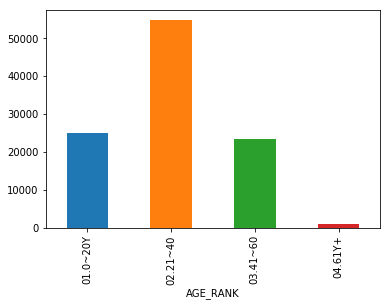

In [39]:
rebuy2 = df[df['EFFECTdate'] == 0] #無回購表單的人
agegroup2 = rebuy2.groupby("AGE_RANK")
data = agegroup2.size() #年齡分層每個組別內的大小
data.plot.bar()
plt.show()

# 再觀察會回購保單的年齡層分布

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


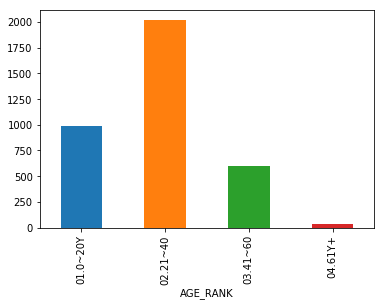

In [30]:
mask = df['EFFECTdate'] != 0 #有回購保單的人
rebuy = df[mask]
agegroup = rebuy.groupby("AGE_RANK")
print(type(agegroup))
data2 =agegroup.size() #每個組別內的大小
data2.plot(kind = 'bar')
#圓餅圖
#data2.plot.pie(figsize=(6, 6))
plt.show()

# 各年齡層在五年內平均理賠次數

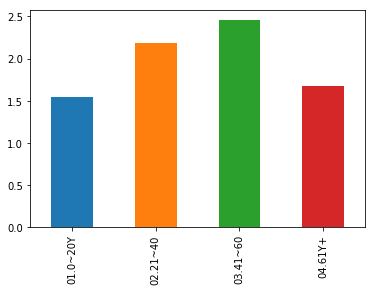

In [38]:
a = agegroup.get_group("01.0~20Y")["CountNo"].mean()
b = agegroup.get_group("02.21~40")["CountNo"].mean()
c = agegroup.get_group("03.41~60")["CountNo"].mean()
d = agegroup.get_group("04.61Y+")["CountNo"].mean()
y_data = pd.Series(data = np.array([a,b,c,d]), index = ["01.0~20Y","02.21~40","03.41~60","04.61Y+"])
y_data.plot(kind = 'bar')
plt.show()
plt.close()